In [1]:
import os, sys
import gymnasium as gym
import time
import numpy as np
import random
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import text_flappy_bird_gym
from Agents.MonteCarloAgent import MonteCarloAgent
from Src.utils import *

# MonteCarlo

## Training

  0%|          | 0/2000 [00:00<?, ?it/s]

Training completed. The agent has learned a policy!


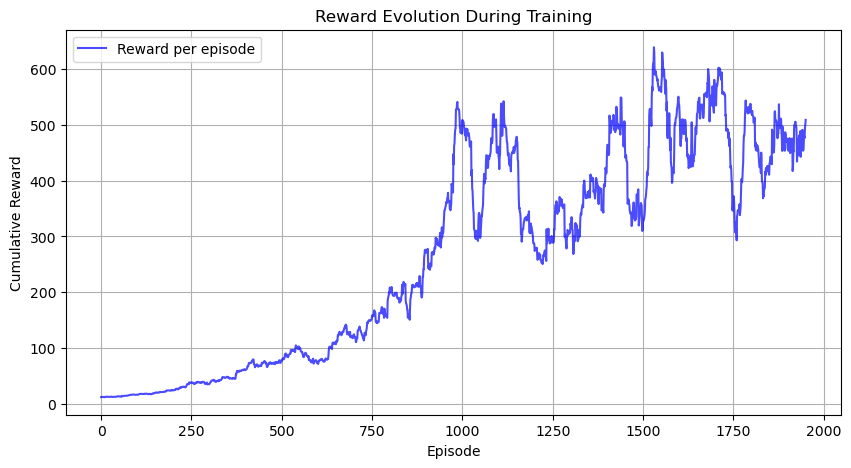

In [9]:
if __name__ == '__main__':
    env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)
    agent = MonteCarloAgent(env, epsilon=1.0, gamma=0.96, alpha=0.2)

    num_episodes = 2000  # Number of training episodes
    reward_history = []

    epsilon_min = 0.01  # Minimum exploration
    epsilon_decay = 0.995  # Gradual reduction

    for episode in tqdm(range(num_episodes)):
        obs, _ = env.reset()
        trajectory = []  # Stores (state, action, reward)
        done = False
        total_reward = 0

        while not done:
            action = agent.select_action(obs)  # Uses the agent's policy
            next_obs, reward, done, _, info = env.step(action)
            trajectory.append((obs, action, reward))  # Store the transition
            obs = next_obs
            total_reward += reward

        reward_history.append(total_reward)

        agent.epsilon = max(epsilon_min, agent.epsilon * epsilon_decay)
        agent.update_policy(trajectory)  # Monte Carlo update after the episode

    print("Training completed. The agent has learned a policy!")
    smoothed_rewards = moving_average(reward_history, window_size=50)
    plot_rewards(smoothed_rewards)

The **Cumulative Reward** curve is increasing, although sometimes the second 1000 episodes may be noisy. 

The results are quite good with a final cumulative reward around 500 !

## Results

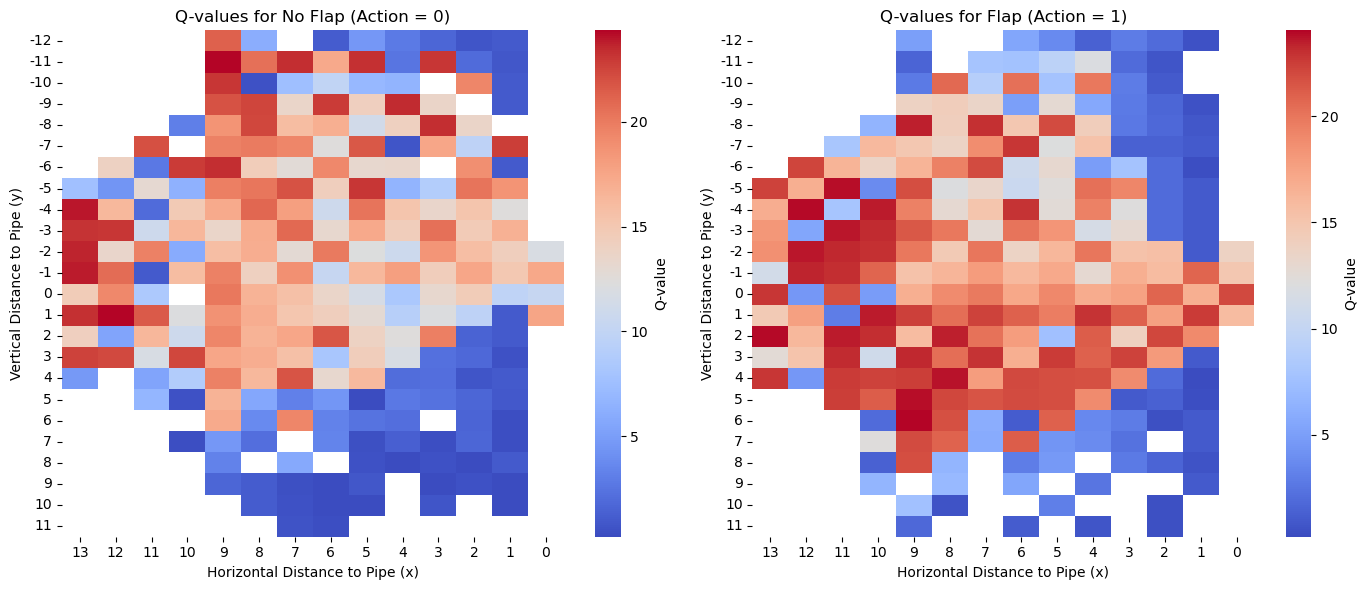

In [14]:
plot_q_values(agent.Q)

The **Q-values Matrix** shows that the agent learnt well. 

Effectively, for the left graph, we are more likely to **not Flap** when the vertical distance with the next pipe is high. This means that **if we are high in the sky, we let the bird fly and fall with the gravity**.

In the contrary, for the right graph, we are more likely to **Flap** if the vertical ditance to the next pipe is low. Which means that **if we are near to the ground, we will flap to gain altitude**.

Finally, in both graphs, we see that when the vertical and horizontal distances are near 0, both actions can be taken. This means that **if we are flying at the good altitude we wait for the bird to pass the pipe**.

**NB** : The vertical distance is positive when the bird is under the next pipe center, and negative when above it. 

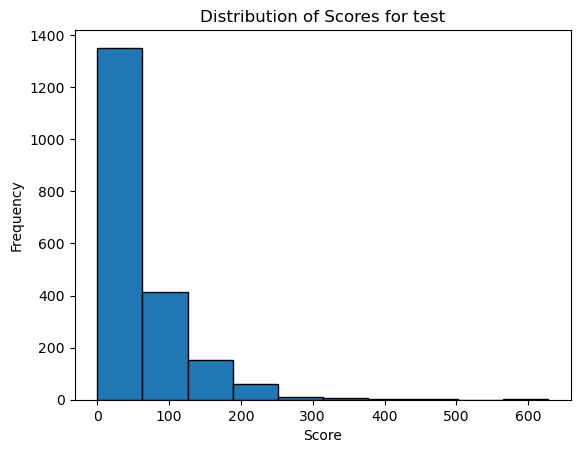

In [12]:
scores = []
states = [state for state, action in agent.Q.keys()]

for i in range(2000):

  obs, _ = env.reset()
  done = False

  while not done:
      # Select best action
      state = tuple(obs)
      if state in states:
        action = agent.select_action(obs)
      else:
        action = env.action_space.sample()  # Random action if unknown state

      obs, reward, done, _, info = env.step(action)
  scores.append(info["score"])

env.close()

plt.hist(scores, edgecolor="black")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores for test")
plt.show()

With this graph, we see that over 2000 try, a lot are around 0-100, and few of them can go above this, until around 300 or 400. 

**NB** The distribution depend on the agent performances, and the graph might change if we recompute the notebook.

  0%|          | 0/10 [00:00<?, ?it/s]

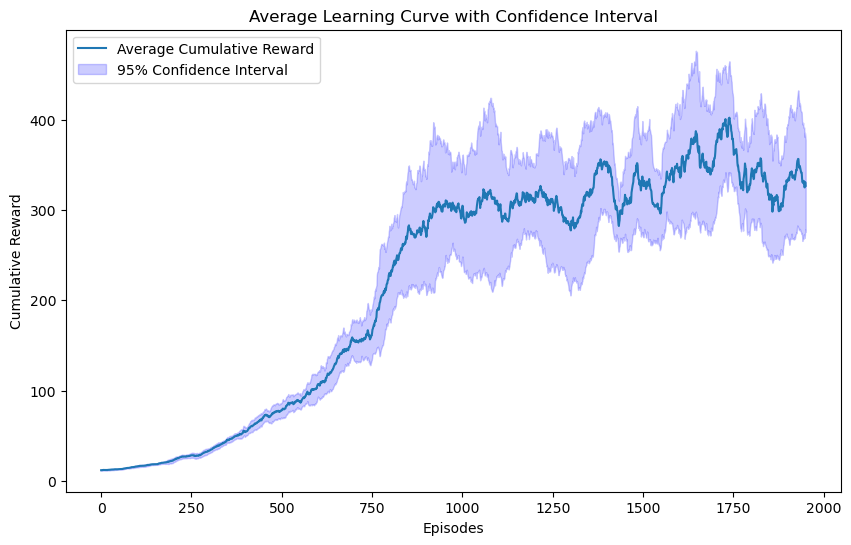

In [8]:
plot_confidence_interval(num_episodes=2000, agent_type="monte_carlo")

This graph shows th **Cumulative reward** in average, with a certain confidence intervale. 

It seems that before 1000 episodes, it increases its performances. But after that point, it is much harder to improve.

In [13]:
# Test
obs, _ = env.reset()
done = False
states = [state for state, action in agent.Q.keys()]

while not done:
    # Render the game
    os.system("clear")
    sys.stdout.write(env.render())
    time.sleep(0.2)  # Control the display speed

    # Select the best action according to the trained policy
    state = tuple(obs)
    if state in states:
        action = agent.select_action(obs)
    else:
        action = env.action_space.sample()  # Random action if state is unknown

    obs, reward, done, _, info = env.step(action)

print("Test completed, final score:", info["score"])
env.close()

Text Flappy Bird!
Score: 0
----------------------
[                   |]
[                   |]
[                   |]
[                   |]
[                   |]
[                   |]
[                   |]
[      @            |]
[                    ]
[                    ]
[                    ]
[                    ]
[                   |]
[                   |]
[                   |]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=13,dy=-3)
Text Flappy Bird!
Score: 0
----------------------
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[      @           | ]
[                    ]
[                    ]
[                    ]
[                    ]
[                  | ]
[                  | ]
[                  | ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=12,dy=-3)
Text Flappy Bird!
Score: 0
----------------------
[     

We can try manually a Flappyird game and see directly how far the agent is abale to go !